# 피부데이터 EDA

# 변수 설명

```
스토어명 : 장소 ( x )

측정기기 : 측정기기 2 종류 (x) 

채널 : 장소 (x)

시,도 : 도시명 (범주형)

광역유무2: ex) 광주 ㅇ구 (x)

년	월	일	시	: (연속형 자료 -> 범주변환 필요)

시간대: 시간대를 미리 범주화 해준것. (오전,오후,저녁) 그대로 사용.

연령: 수치형

연령대: 범주형

성별:	범주형

피부타입 : 범주형 (1~7) 

수분	: target (수치형)

유분 : 수치형

탄력 : 수치형

평균 기온 :	 수치형

강수량	: 수치형

평균 풍속 : 수치형

평균 습도 :	수치형

일조합 : 수치형. 실제로 땅에 해가 비치는 시간.

미세먼지 : 수치형

```
- 데이터의 누락값은 * 로 표시되어 있어서 NA로 모두 수정 필요 


- 변수들을 보고 생각한 가설 및 변수 가공.
    - 스토어명, 채널, 광역유무( ㅇㅇ구), 는 제거.
    - 피부 수분값은 계절성이 뚜렷할것이라 생각하며, 이를 위해 dummy 변수를 추가.
    - 시 대신, 시간대 사용.
    - 연령대 컬럼대신, 연령을 보고 직접 나눠보기.


- 고민되는 것
    - 수분 NA값은 어떻게 처리 할 것인지.


## 생각해본 주제
- 수분값을 예측하는건 의미 없다고 생각이 드네요. 비교 대상도 없고 목표도 모호하기 때문에. (제일 편해 보이긴함.)
- 수분방정식 활용 목적을 새로 찾기
    - 수분 타입 분류. (A,B,C,D). 그에 따라 지역별 피부 비교.(시각화) , 나이대별 피부 비교.

# 데이터 확인

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import pandas as pd
import sys

In [2]:
#시각화 패키지들
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

plt.style.use("ggplot")

In [3]:
#분석 관련
from scipy.stats import chi2_contingency
from scipy.stats import kstest
from statsmodels.formula.api import ols

In [4]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [5]:
# 파일 불러오기
train = pd.read_excel('./data/skin2.xlsx')
#submission = pd.read_csv('./data/sample_submission.csv')

In [ ]:
train.head()

In [ ]:
train.info()

## 데이터 수정

In [ ]:
# 컬럼 제거.
train.drop(['스토어명','채널','광역유무2','key3333'],axis=1,inplace=True)


In [ ]:
# * 들 nan 수정
train=train.replace('*',np.nan)

In [ ]:
#데이터 타입들 돌아온것 확인
train.info()

In [18]:
train.to_excel("./data/train_pre1.xlsx",index=False)

In [6]:
# 파일 불러오기
train = pd.read_excel('./data/train_pre1.xlsx')
#submission = pd.read_csv('./data/sample_submission.csv')

In [7]:
train.tail()

,측정기기,"시,도",년,월,일,시,시간대,연령,연령대,성별,피부타입,수분,유분,탄력,평균 기온,강수량,평균 풍속,평균 습도,일조합,미세먼지
559692,스킨터치2,서울특별시,2014,8,16,18,저녁,59.0,50.0,여자,1.0,NaN,57,NaN,25.2,172.8,2.4,77.0,150.7,29.0
559693,스킨터치2,서울특별시,2015,6,15,16,오후,60.0,60.0,여자,5.0,NaN,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN
559694,스킨터치2,서울특별시,2014,8,24,15,오후,61.0,60.0,여자,2.0,NaN,7,NaN,25.2,172.8,2.4,77.0,150.7,29.0
559695,스킨터치2,서울특별시,2015,4,15,18,저녁,64.0,60.0,여자,2.0,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
559696,스킨터치2,대전광역시,2014,8,14,12,오후,67.0,60.0,여자,2.0,NaN,6,NaN,24.2,240.9,1.6,87.0,126.3,23.0


## NA 확인

In [8]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 있는 컬럼은: 연령 입니다
해당 컬럼에 총 3161 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: 연령대 입니다
해당 컬럼에 총 3161 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: 성별 입니다
해당 컬럼에 총 862 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: 피부타입 입니다
해당 컬럼에 총 3947 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: 수분 입니다
해당 컬럼에 총 6604 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: 탄력 입니다
해당 컬럼에 총 17323 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: 평균 기온 입니다
해당 컬럼에 총 16719 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: 강수량 입니다
해당 컬럼에 총 16719 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: 평균 풍속 입니다
해당 컬럼에 총 16719 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: 평균 습도 입니다
해당 컬럼에 총 16719 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: 일조합 입니다
해당 컬럼에 총 16719 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: 미세먼지 입니다
해당 컬럼에 총 16719 개의 결측치가 존재합니다.


중요한 수분 컬럼에 결측치가 많다.

처리는 어떻게 할 것인지?

### na 제거

이미 데이터가 많아서, 제거해도 상관없다고 판단.

In [9]:
train.dropna(axis=0,inplace=True)

In [10]:
missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


아래부터 시작하면 된다.

In [11]:
import pickle

train.to_excel("./data/train_nona.xlsx",index=False)
train.to_pickle('./data/train_nona.pkl')


In [ ]:
train = pd.read_pickle('./data/train_nona.pkl')

## 범주형 level 확인

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559697 entries, 0 to 559696
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   측정기기    559697 non-null  object 
 1   시,도     559697 non-null  object 
 2   년       559697 non-null  int64  
 3   월       559697 non-null  int64  
 4   일       559697 non-null  int64  
 5   시       559697 non-null  int64  
 6   시간대     559697 non-null  object 
 7   연령      556536 non-null  float64
 8   연령대     556536 non-null  float64
 9   성별      558835 non-null  object 
 10  피부타입    555750 non-null  float64
 11  수분      553093 non-null  float64
 12  유분      559697 non-null  int64  
 13  탄력      542374 non-null  float64
 14  평균 기온   542978 non-null  float64
 15  강수량     542978 non-null  float64
 16  평균 풍속   542978 non-null  float64
 17  평균 습도   542978 non-null  float64
 18  일조합     542978 non-null  float64
 19  미세먼지    542978 non-null  float64
dtypes: float64(11), int64(5), object(4)
memory usage

In [33]:
print('시,도 \n',train['시,도'].unique())
print('시간대 \n',train['시간대'].unique())

print('연령대 \n',train['연령대'].unique())

print('성별 \n',train['성별'].unique())

print('피부타입 \n',train['피부타입'].unique())


시,도 
 ['광주광역시' '서울특별시' '부산광역시' '울산광역시' '대구광역시' '인천광역시' '대전광역시' '제주특별자치도']
시간대 
 ['저녁' '오후' '오전']
연령대 
 [20. 30. 40. 50. 60. 70. 80. nan 10. 90.]
성별 
 ['여자' '남자' nan]
피부타입 
 [ 4.  6.  3. nan  2.  1.  5.]


# 범주형 변수 확인

## 시,도

지역에 따라 수분 값에 차이가 있는지 확인

In [39]:
train.groupby("시,도")["수분"].mean()

시,도
광주광역시      49.014549
대구광역시      48.287869
대전광역시      47.970694
부산광역시      46.519203
서울특별시      46.181098
울산광역시      52.816089
인천광역시      45.997758
제주특별자치도    49.367851
Name: 수분, dtype: float64

인천만 약간 낮고 모두 비슷한 평균을 가진다.

<AxesSubplot:xlabel='수분', ylabel='Count'>

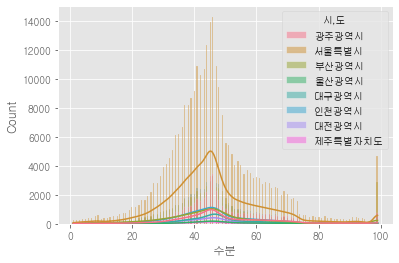

In [40]:
sns.histplot(x=train['수분'],kde=True,hue=train['시,도'])

지역에 따라 도수는 차이가 있지만, 비율에는 큰 차이가 없어보인다.



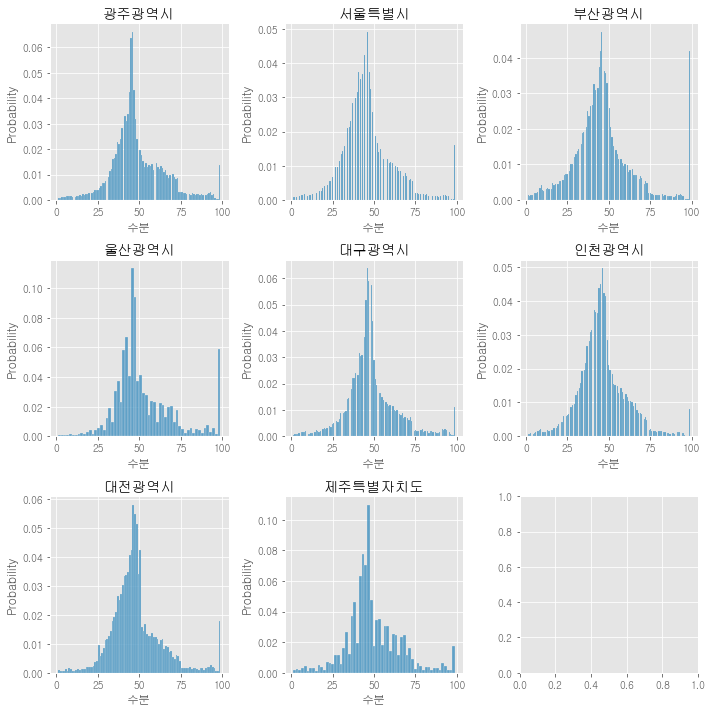

In [67]:
fig,axes=plt.subplots(3,3,figsize=(10,10))
axes=axes.flatten()

city_list=train['시,도'].unique()

for i in range(len(city_list)):
    
    sns.histplot( x=train.loc[train['시,도']==city_list[i]]['수분'], ax=axes[i],stat='probability').set_title(city_list[i])
plt.tight_layout()
plt.show()

자세히 보면, 남부지방이 좀더 수분 비율이 좋음을 볼 수 있다.

## 연, 월, 시

계절성이 있는지 확인

<AxesSubplot:xlabel='수분', ylabel='Probability'>

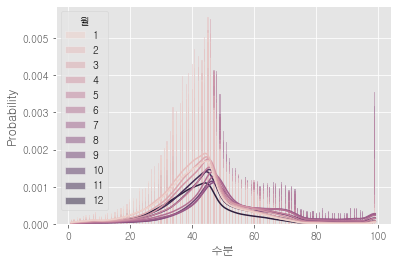

In [69]:
sns.histplot(x=train['수분'],kde=True,hue=train['월'],stat='probability')

1,2월에 수분이 낮아보인다.

In [77]:
np.sort(train['월'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

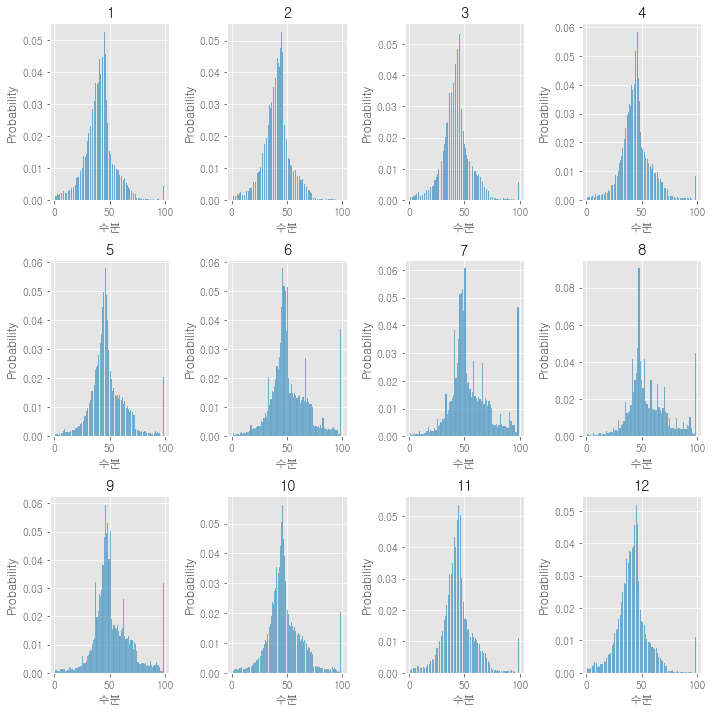

In [80]:
fig,axes=plt.subplots(3,4,figsize=(10,10))
axes=axes.flatten()

month_list=np.sort(train['월'].unique())

for i in range(len(month_list)):
    
    sns.histplot( x=train.loc[train['월']==month_list[i]]['수분'], ax=axes[i],stat='probability').set_title(month_list[i])
plt.tight_layout()
plt.show()

자세히 보니, 큰 차이가 없어보인다.

마찬가지로 99점에서 비율 차이가 보인다.

6,7,8월에서 가장 큰 비율을 보인다.

# 수치형 변수 확인

## 수분

<AxesSubplot:xlabel='수분', ylabel='Count'>

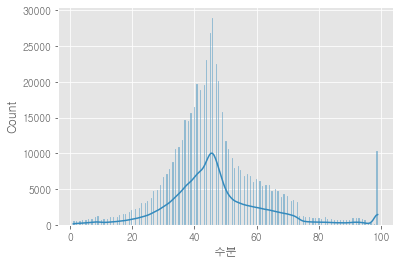

In [29]:
sns.histplot(x=train['수분'],kde=True)

수분 데이터는 따로 log 변환이 필요없음을 볼 수 있다.



75이상 A. 50이상 B. 35이상 C. 그 이하  D 이렇게 분류해보는건 어떨까.

c에 가장 많이 모여있음을 볼 수 있다.

## 유분

<AxesSubplot:xlabel='유분', ylabel='Count'>

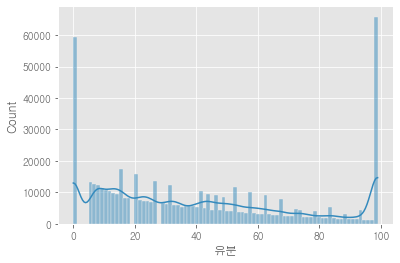

In [35]:
sns.histplot(x=train['유분'],kde=True)

유분은 양 극단에 모여있는 편이다.

In [11]:
train['수분'].max()

99.0